In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,RobustScaler
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)
np.random.RandomState(1)

RandomState(MT19937) at 0x7F61DEA1A270

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/train.csv'
TEST_PATH = '/content/drive/MyDrive/Colab Notebooks/test.csv'
SUB_PATH = '/content/drive/MyDrive/Colab Notebooks/SampleSubmission.csv'

In [ ]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUB_PATH)


In [ ]:
trainset = train.copy()
testset = test.copy()

In [ ]:
train.head(20)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1
7,ID_MUEQIKPY6X5O,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1
9,ID_FR804PILRAZ0,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0


In [ ]:
train.shape

(297177, 7)

In [ ]:
testset.shape

(127361, 6)

In [ ]:
submission.shape

(127361, 2)

In [ ]:
df = trainset.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


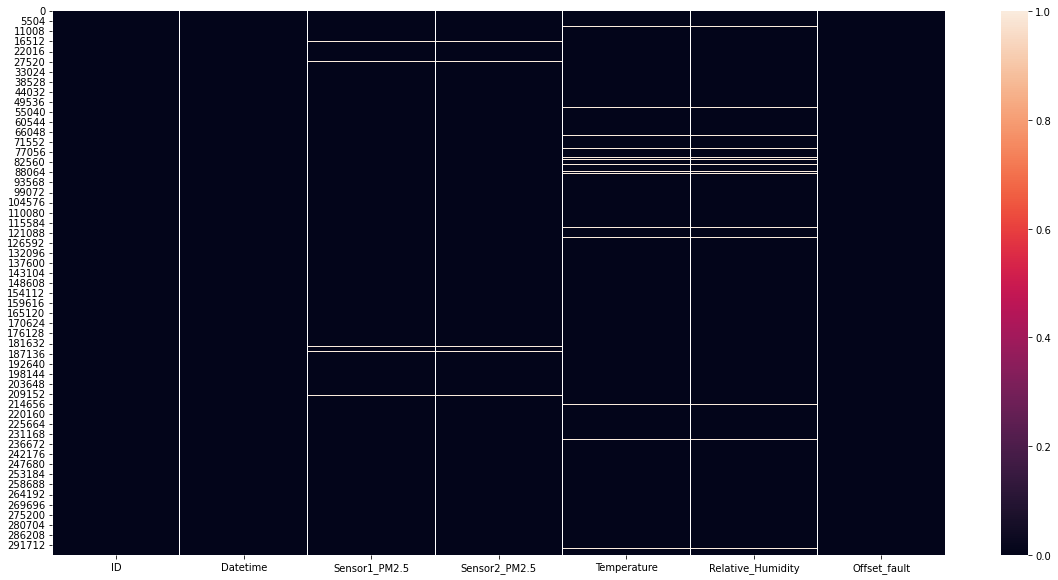

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna() , cbar =True )

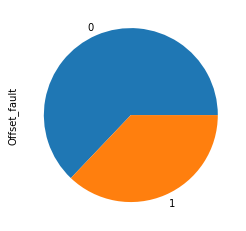

In [ ]:
(df['Offset_fault'].value_counts()).plot.pie()

In [ ]:
df.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [ ]:
df['Relative_Humidity'].value_counts()  #/df.shape[0]

91.0    17082
89.0    14491
93.0    12286
95.0    10995
92.0    10894
        ...  
38.0      131
34.0      130
31.0      129
30.0      126
33.0      119
Name: Relative_Humidity, Length: 70, dtype: int64

In [ ]:
float_columns =list (df.select_dtypes('float'))
print(float_columns)

['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']


In [ ]:
int_columns =list (df.select_dtypes('int'))
print(int_columns)

['Offset_fault']


In [ ]:
df['Sensor1_PM2.5'].describe()

count    293563.000000
mean         40.751195
std          28.526182
min          -9.450000
25%          22.430000
50%          36.470000
75%          49.420000
max         997.960000
Name: Sensor1_PM2.5, dtype: float64

In [ ]:
df['Sensor2_PM2.5'].describe()

count    293563.000000
mean         38.183018
std          28.647761
min          -9.700000
25%          19.520000
50%          33.720000
75%          47.570000
max         997.260000
Name: Sensor2_PM2.5, dtype: float64

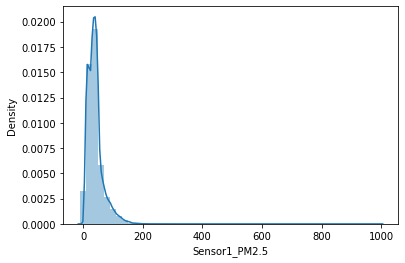

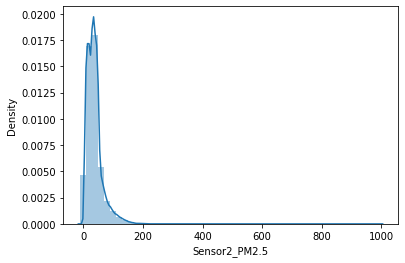

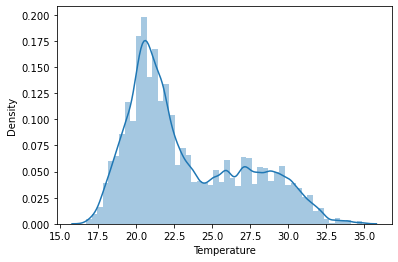

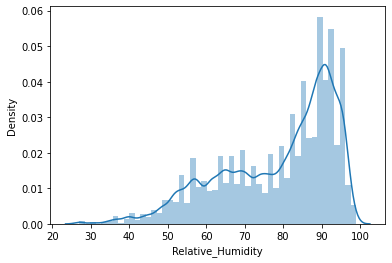

In [ ]:
for col in float_columns :
    plt.figure()
    sns.distplot(df[col])

In [ ]:
df['Temperature'].describe()

count    293628.000000
mean         23.316554
std           3.836971
min          16.700000
25%          20.400000
50%          21.900000
75%          26.300000
max          34.900000
Name: Temperature, dtype: float64

In [ ]:
faulty = df[df['Offset_fault'] == 1]
not_faulty = df[df['Offset_fault'] == 0]
useful_columns = df [['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity']]


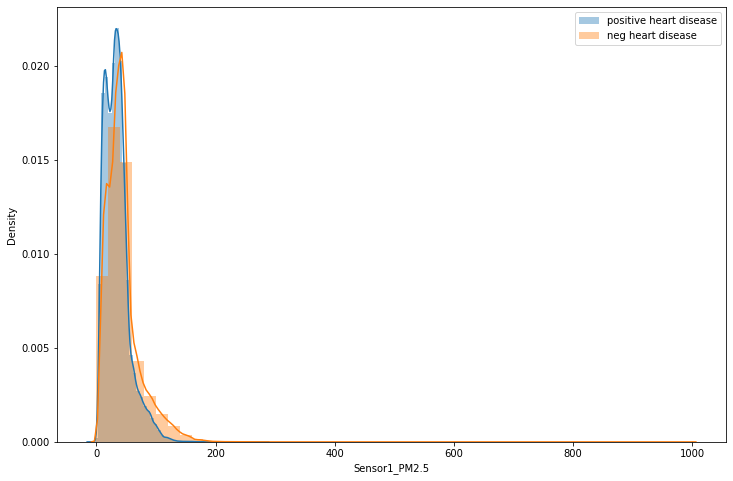

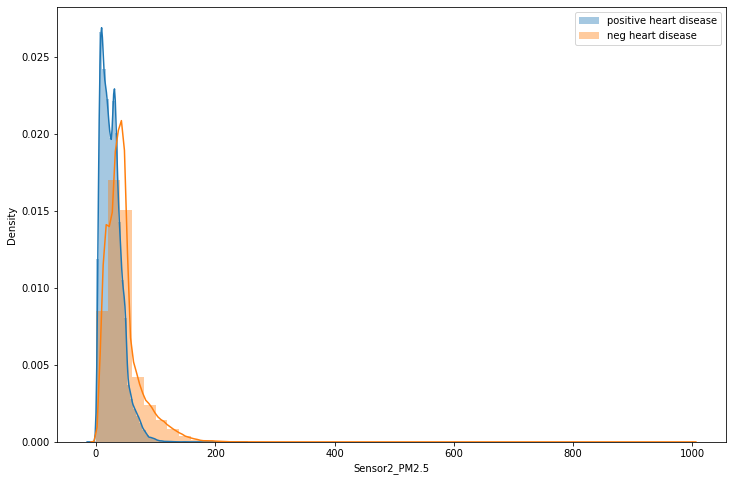

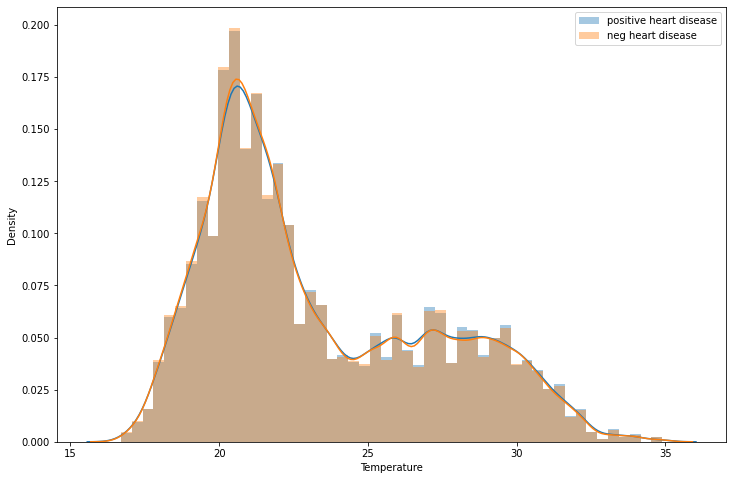

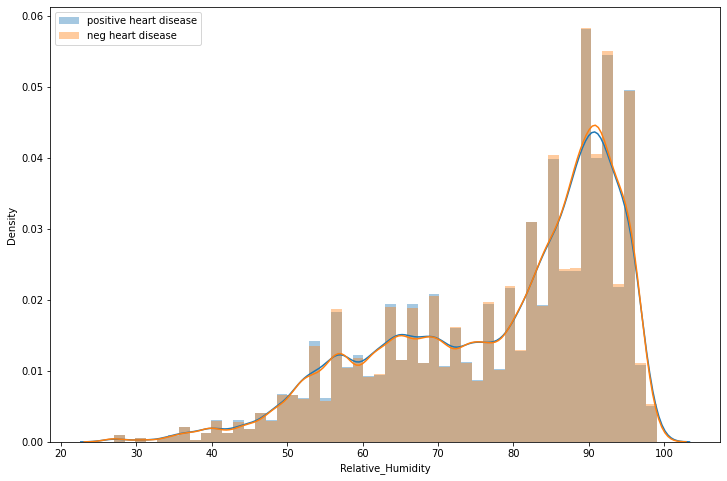

In [ ]:
for col in useful_columns :
    plt.figure(figsize=(12,8))
    sns.distplot(faulty[col] , label = 'positive heart disease')
    sns.distplot(not_faulty[col] , label = 'neg heart disease')
    plt.legend()

In [ ]:
#Xtrain = df.drop(['Offset_fault'] , axis =1)
#Ytrain = df['Offset_fault']
df = df.drop(['ID'  , 'Datetime'] , axis =1)

In [ ]:
df.columns

Index(['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature', 'Relative_Humidity',
       'Offset_fault'],
      dtype='object')

In [ ]:
df.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,52.58,49.52,17.4,96.0,0
1,35.25,33.40,25.0,75.0,0
2,19.18,23.50,24.9,75.0,0
3,19.40,15.48,24.9,70.0,0
4,38.30,34.77,20.9,89.0,0


In [ ]:
df =df.dropna()

In [ ]:
df.shape

(290014, 5)

In [ ]:
df.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,52.58,49.52,17.4,96.0,0
1,35.25,33.40,25.0,75.0,0
2,19.18,23.50,24.9,75.0,0
3,19.40,15.48,24.9,70.0,0
4,38.30,34.77,20.9,89.0,0


In [ ]:
df['Offset_fault'].value_counts()/df.shape[0]

0    0.630532
1    0.369468
Name: Offset_fault, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#from catboost import  CatBoostClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,RobustScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix , classification_report , f1_score ,accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_selection import VarianceThreshold , SelectFromModel , SelectKBest ,chi2 ,f_classif
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.drop(['Offset_fault'] , axis =1)
y = df['Offset_fault']

In [ ]:
def EVALUATION(model) :
    scores = cross_val_score(model , X, y, cv=3 , scoring= 'accuracy' )  #,  return_train_score=True
    print('accuracy  :' ,scores)
    print('average accuracy :' , scores.mean())
    N ,train_score , val_score =learning_curve(model, X , y , cv =4 , scoring = 'accuracy' , train_sizes = np.linspace(0.1 , 1 , 10))
    plt.figure(figsize=(12,8))
    plt.plot(N , train_score.mean(axis =1) , label = 'train score')
    plt.plot(N , val_score.mean(axis =1) , label = 'validation score')
    plt.legend()
    #print(train_score.mean(axis =1).min())
    #print(val_score.mean(axis =1).max())

accuracy  : [0.94332382 0.94201984 0.94242327]
average accuracy : 0.9425889759292976


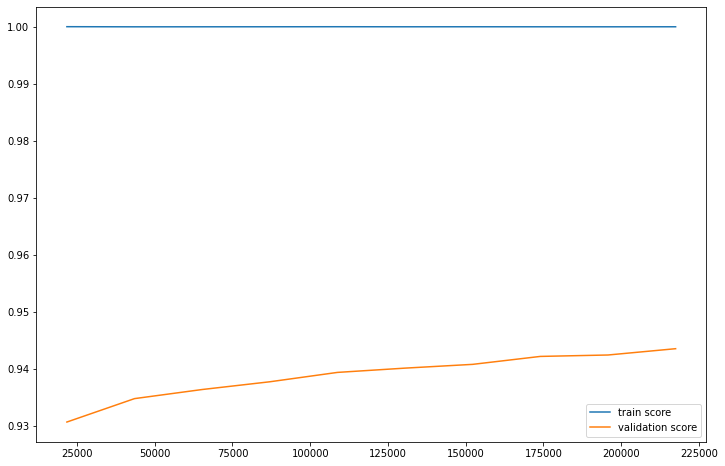

In [ ]:
model = RandomForestClassifier(random_state=2)
EVALUATION(model)